In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "PM_train.txt"

In [3]:
data = pd.read_csv(file_path, delimiter= ' ', header = None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [5]:

lista_colunas = [
'id',
'runtime',
'setting1',
'setting2', 
'setting3']
for tag_number in range(1, 22):
    tag = f'tag_{tag_number}'
    lista_colunas.append(tag)
lista_colunas





['id',
 'runtime',
 'setting1',
 'setting2',
 'setting3',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7',
 'tag_8',
 'tag_9',
 'tag_10',
 'tag_11',
 'tag_12',
 'tag_13',
 'tag_14',
 'tag_15',
 'tag_16',
 'tag_17',
 'tag_18',
 'tag_19',
 'tag_20',
 'tag_21']

In [6]:
dict_map = {old_name: new_name for old_name, new_name in zip(data.columns, lista_colunas)}

data.rename(columns=dict_map, inplace=True)

In [7]:
#Cria lista com o nome real de cada coluna
lista_colunas = [
'id',
'runtime',
'setting1',
'setting2', 
'setting3']
for tag_number in range(1, 22):
    tag = f'tag_{tag_number}'
    lista_colunas.append(tag)

#Cria dicionário que possui nas chaves o nome antigo das colunas e nos valores o novo nome
dict_map = {old_name: new_name for old_name, new_name in zip(data.columns, lista_colunas)}

#Utiliza a função rename da biblioteca pandas para substituir os nomes antigos pelos novos utilizando o dicionário acima.
data.rename(columns=dict_map, inplace=True)


In [8]:
index_limit = data[(data.id == 1) & (data.runtime == data[data.id == 1].runtime.max())].index
data.iloc[index_limit[0]-5:index_limit[0]+5]

,id,runtime,setting1,setting2,setting3,tag_1,tag_2,tag_3,tag_4,tag_5,...,tag_14,tag_15,tag_16,tag_17,tag_18,tag_19,tag_20,tag_21,26,27
186,1,187,-0.0047,-0.0000,100.0,518.67,643.32,1592.10,1427.27,14.62,...,8115.67,8.5218,0.03,396,2388,100.0,38.42,23.0822,NaN,NaN
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,NaN,NaN
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,NaN,NaN
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,NaN,NaN
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,NaN,NaN
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,NaN,NaN
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,NaN,NaN
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085,NaN,NaN
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250,NaN,NaN
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,8140.44,8.4018,0.03,391,2388,100.0,39.13,23.5027,NaN,NaN


In [9]:
data.describe()

,id,runtime,setting1,setting2,setting3,tag_1,tag_2,tag_3,tag_4,tag_5,...,tag_14,tag_15,tag_16,tag_17,tag_18,tag_19,tag_20,tag_21,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [10]:
#Pela info, não há necessidade de adicionar valores restantes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   runtime   20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   tag_1     20631 non-null  float64
 6   tag_2     20631 non-null  float64
 7   tag_3     20631 non-null  float64
 8   tag_4     20631 non-null  float64
 9   tag_5     20631 non-null  float64
 10  tag_6     20631 non-null  float64
 11  tag_7     20631 non-null  float64
 12  tag_8     20631 non-null  float64
 13  tag_9     20631 non-null  float64
 14  tag_10    20631 non-null  float64
 15  tag_11    20631 non-null  float64
 16  tag_12    20631 non-null  float64
 17  tag_13    20631 non-null  float64
 18  tag_14    20631 non-null  float64
 19  tag_15    20631 non-null  float64
 20  tag_16    20631 non-null  fl

In [11]:
#Tirar as colunas vazias:
data.drop([26, 27], axis = 1, inplace = True)
data.head()

,id,runtime,setting1,setting2,setting3,tag_1,tag_2,tag_3,tag_4,tag_5,...,tag_12,tag_13,tag_14,tag_15,tag_16,tag_17,tag_18,tag_19,tag_20,tag_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [12]:
#Vendo número de ciclos até a falha de cada id:
for i in range(1, data['id'].max()+1):
    print(f'Id {i} - Quantidade de ciclos até a falha = ',len(data[data['id'] == i]))


Id 1 - Quantidade de ciclos até a falha =  192
Id 2 - Quantidade de ciclos até a falha =  287
Id 3 - Quantidade de ciclos até a falha =  179
Id 4 - Quantidade de ciclos até a falha =  189
Id 5 - Quantidade de ciclos até a falha =  269
Id 6 - Quantidade de ciclos até a falha =  188
Id 7 - Quantidade de ciclos até a falha =  259
Id 8 - Quantidade de ciclos até a falha =  150
Id 9 - Quantidade de ciclos até a falha =  201
Id 10 - Quantidade de ciclos até a falha =  222
Id 11 - Quantidade de ciclos até a falha =  240
Id 12 - Quantidade de ciclos até a falha =  170
Id 13 - Quantidade de ciclos até a falha =  163
Id 14 - Quantidade de ciclos até a falha =  180
Id 15 - Quantidade de ciclos até a falha =  207
Id 16 - Quantidade de ciclos até a falha =  209
Id 17 - Quantidade de ciclos até a falha =  276
Id 18 - Quantidade de ciclos até a falha =  195
Id 19 - Quantidade de ciclos até a falha =  158
Id 20 - Quantidade de ciclos até a falha =  234
Id 21 - Quantidade de ciclos até a falha =  195
I

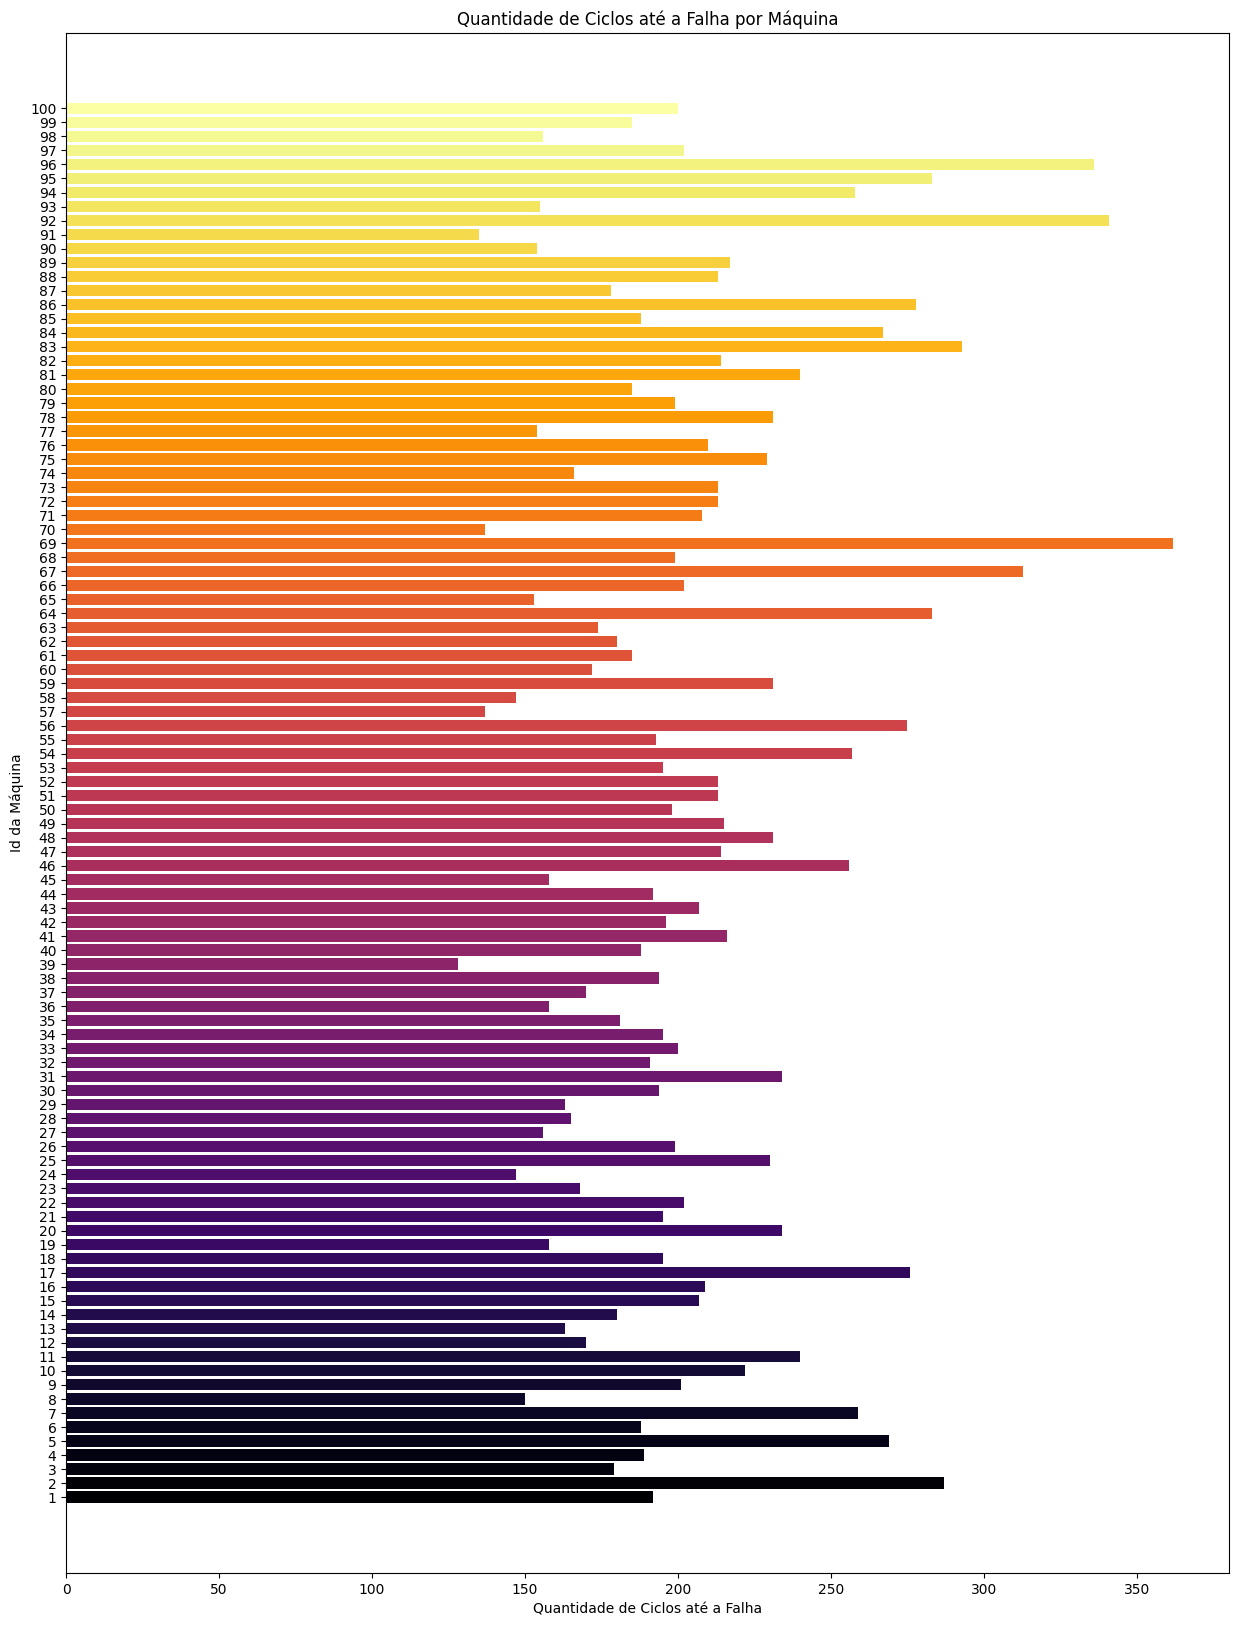

In [13]:
afericao_falha = []
maquina = []
for i in range(1, data['id'].max()+1):
    maquina.append(i)
    ultima_falha = len(data[data['id'] == i])
    afericao_falha.append(ultima_falha)

cmap = plt.get_cmap('inferno')
fig, ax = plt.subplots(figsize = (15, 20))
ax.barh(maquina, afericao_falha, color=cmap(np.linspace(0, 1, len(maquina))))
ax.set_ylabel('Id da Máquina')
ax.set_yticks(range(1, data['id'].max()+1))
ax.set_xlabel('Quantidade de Ciclos até a Falha')
ax.set_title('Quantidade de Ciclos até a Falha por Máquina')
plt.show()



In [14]:
df_falha = pd.DataFrame({'id' : maquina, 'ultima_afericao' : afericao_falha})

In [15]:
df_falha.sort_values(by = 'ultima_afericao')

,id,ultima_afericao
38,39,128
90,91,135
69,70,137
56,57,137
57,58,147
...,...,...
82,83,293
66,67,313
95,96,336
91,92,341


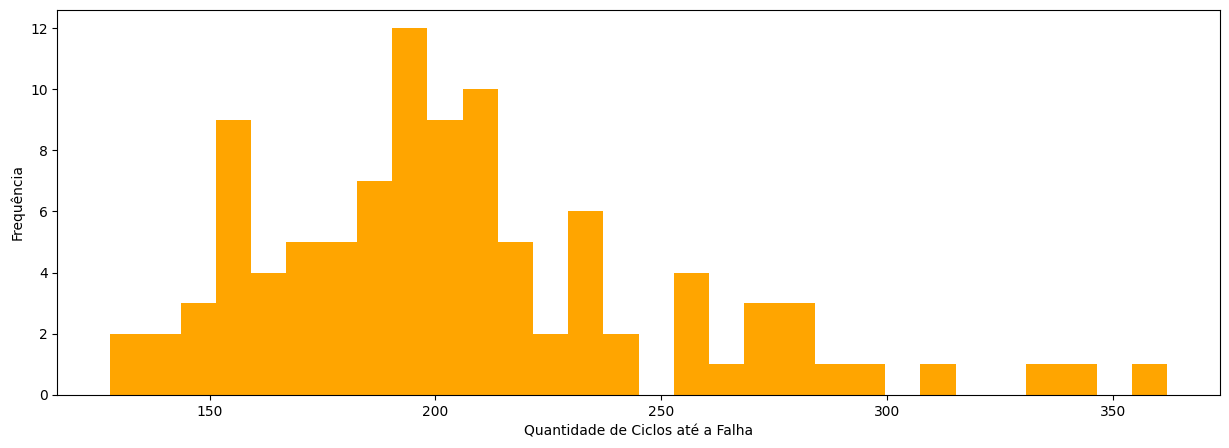

In [16]:
cmap = plt.get_cmap('inferno')
fig, ax = plt.subplots(figsize = (15, 5))
ax.hist(afericao_falha, bins = 30, color='orange')
ax.set_ylabel('Frequência')
ax.set_xlabel('Quantidade de Ciclos até a Falha')
#ax.set_title('Quantidade de Ciclos até a Falha por Máquina')
plt.show()

In [17]:
print('Média: ',df_falha['ultima_afericao'].mean())
print('Mediana: ',df_falha['ultima_afericao'].median())
print('Moda: ',df_falha['ultima_afericao'].mode()[0])

Média:  206.31
Mediana:  199.0
Moda:  213


In [18]:
df_falha.ultima_afericao.describe()

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: ultima_afericao, dtype: float64

In [163]:
df_falha.groupby(by='ultima_afericao').count().reset_index().sort_values(by = 'id', ascending=False)

,ultima_afericao,id
39,213,5
28,195,4
21,185,3
22,188,3
31,199,3
...,...,...
1,135,1
36,208,1
37,209,1
38,210,1


In [192]:
data.tag_1

0        518.67
1        518.67
2        518.67
3        518.67
4        518.67
          ...  
20626    518.67
20627    518.67
20628    518.67
20629    518.67
20630    518.67
Name: tag_1, Length: 20631, dtype: float64

<Axes: >

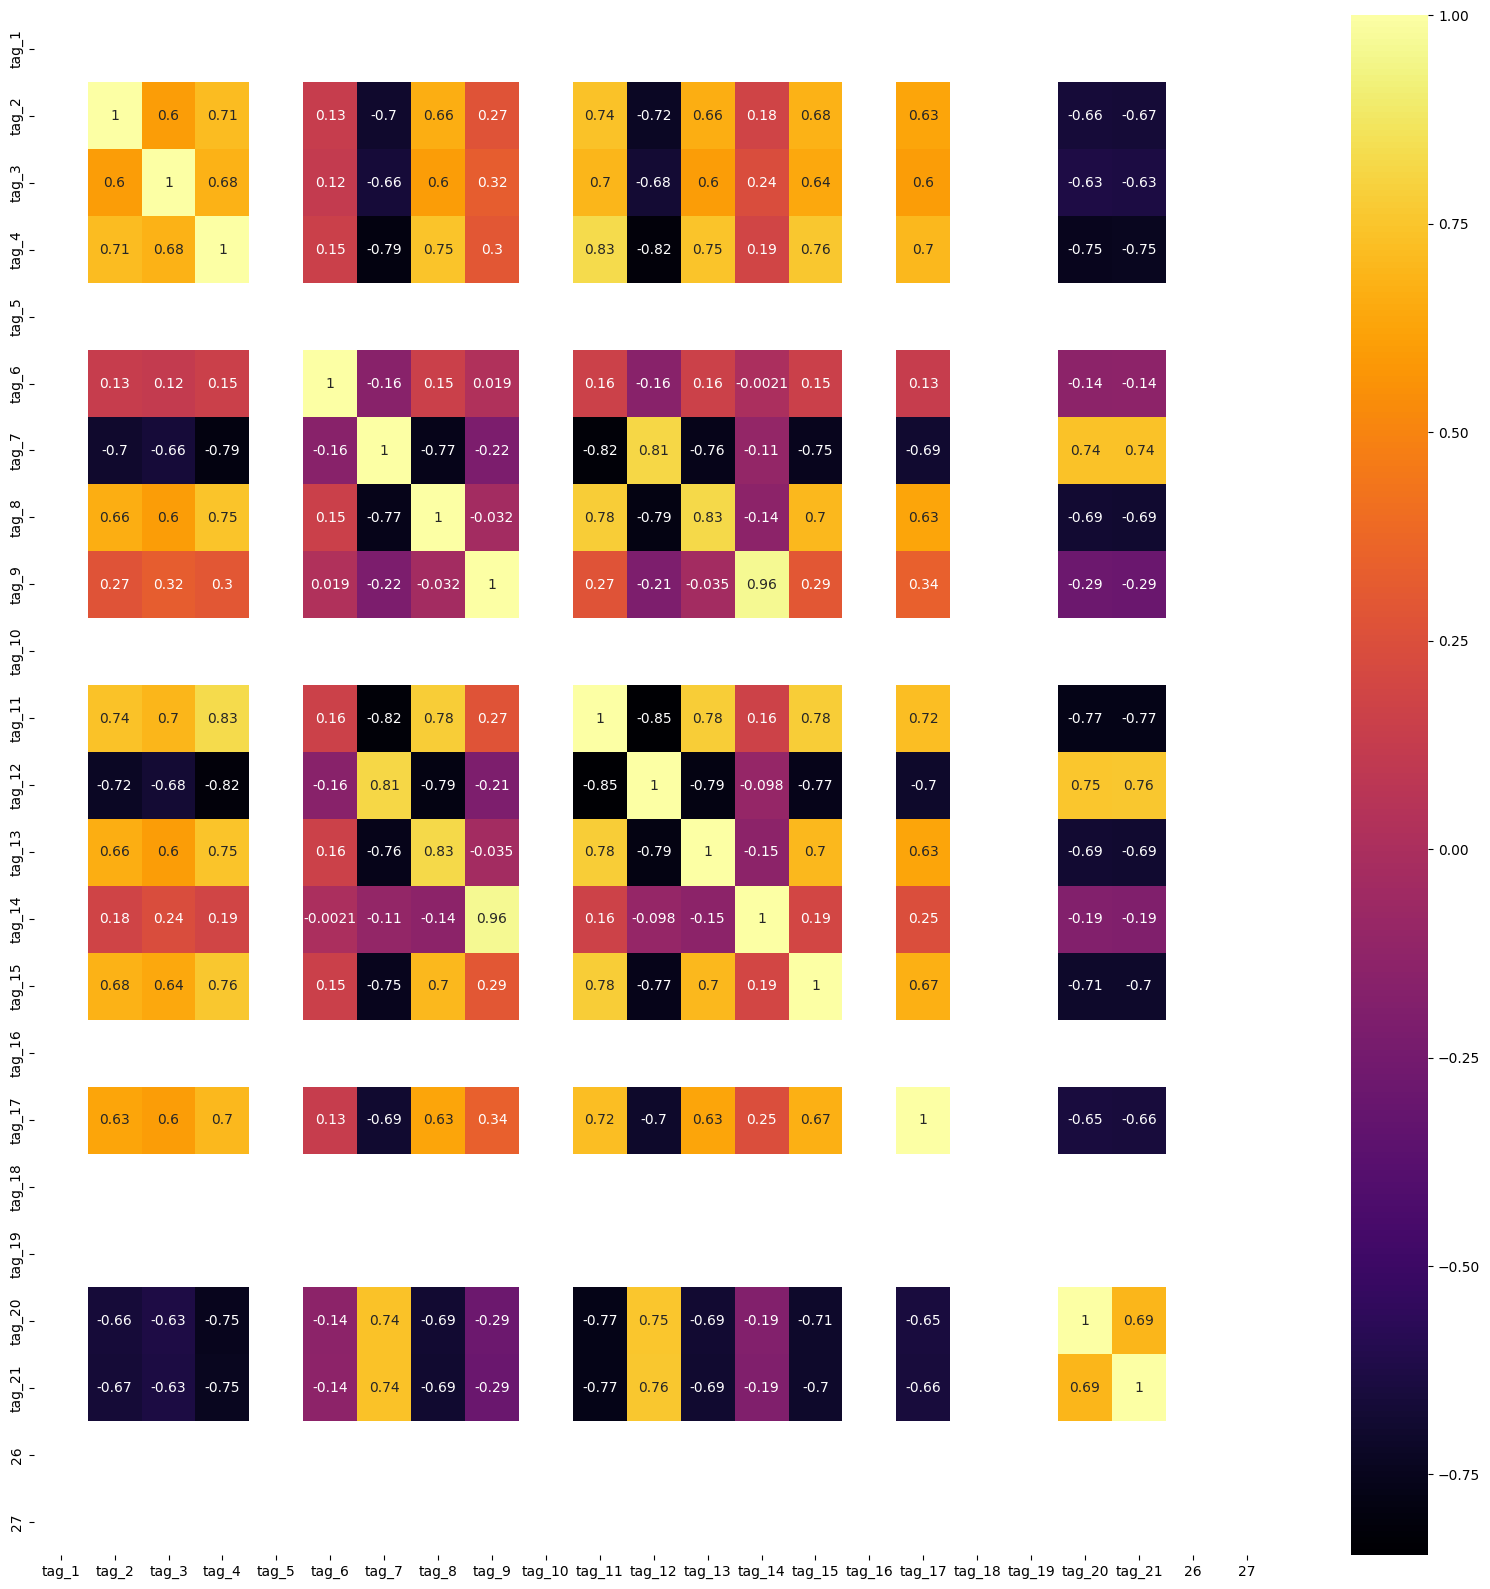

In [188]:
plt.figure(figsize = (20, 20))
sns.heatmap(data.iloc[:, 5:].corr(), annot = True, cmap = 'inferno')

In [23]:
import seaborn as sns

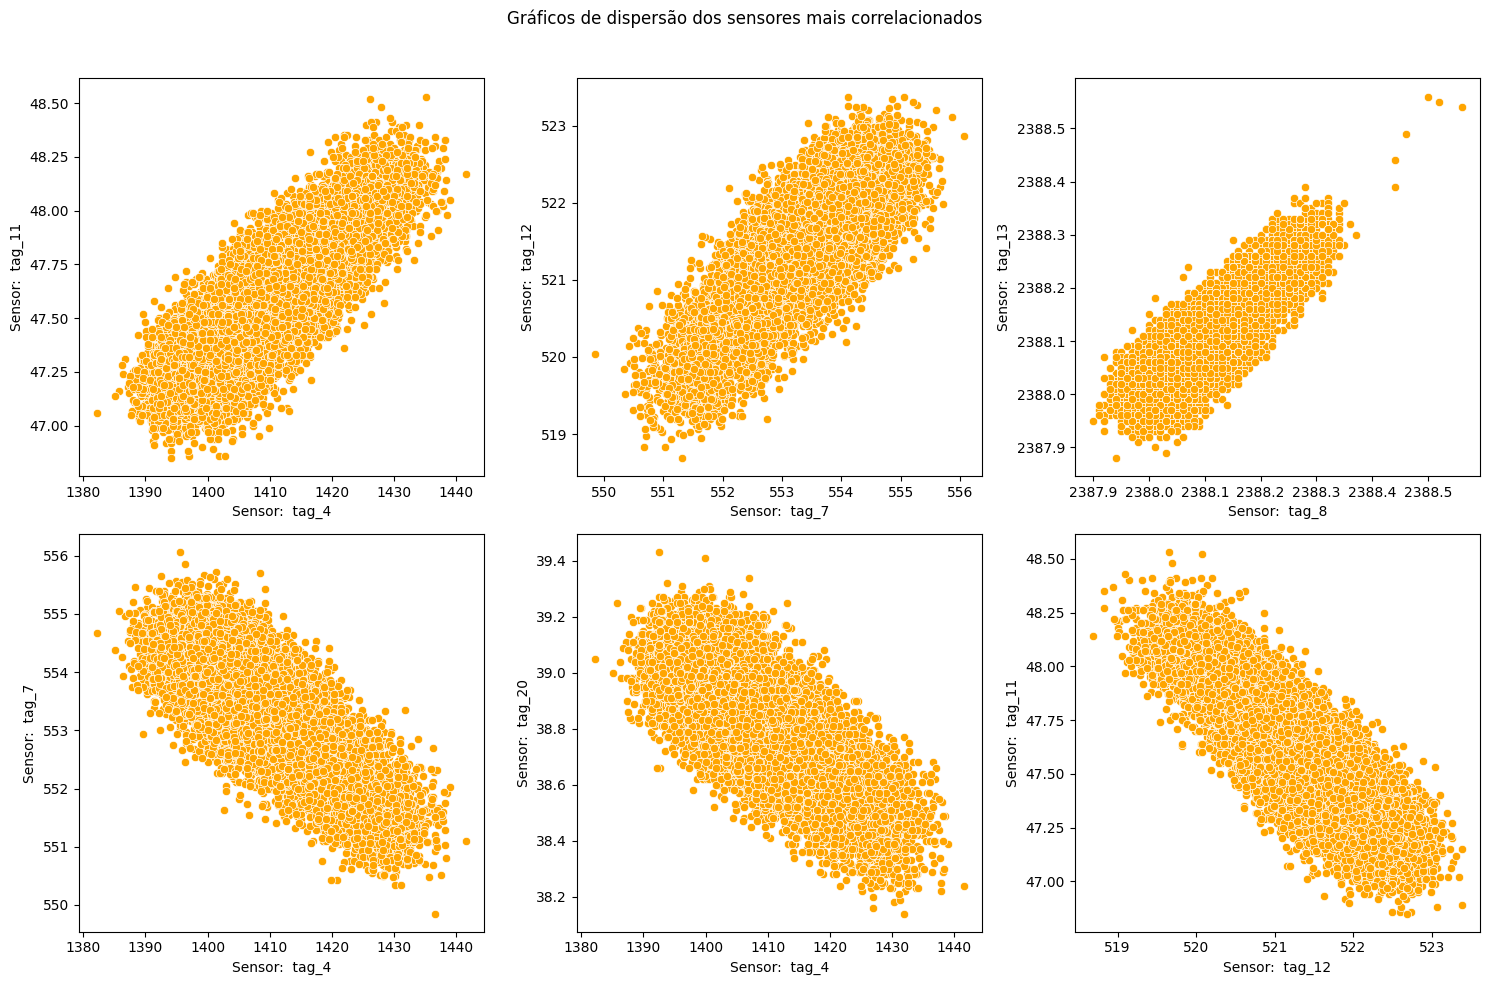

In [42]:
# Definir pares de colunas
pairs = [('tag_4', 'tag_11'), ('tag_7', 'tag_12'), ('tag_8', 'tag_13'),
         ('tag_4', 'tag_7'), ('tag_4', 'tag_20'), ('tag_12', 'tag_11')]

# Configurar a figura e os eixos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Gráficos de dispersão dos sensores mais correlacionados')

# Iterar sobre os pares de colunas e criar gráficos de dispersão
for (x, y), ax in zip(pairs, axes.flatten()):
    sns.scatterplot(x=x, y=y, data=data, ax=ax, color = 'orange')
    ax.set_xlabel(f'Sensor:  {x}')
    ax.set_ylabel(f'Sensor:  {y}')

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar o gráfico
plt.show()

In [55]:
data['falha_maquina'] = 0
#Criando target: Prever falha em até 15 ciclos antes
equipamentos_unicos = data['id'].unique()
for equipamento in equipamentos_unicos:
    # Encontre o índice da linha onde ocorre a falha
    indice_falha = data[data['id'] == equipamento].index.max()
    
    # Defina as últimas 15 linhas até a falha como target = 1
    if indice_falha >= 1:
        data.loc[indice_falha:indice_falha, 'falha_maquina'] = 1
    else:
        data.loc[:indice_falha, 'falha_maquina'] = 0

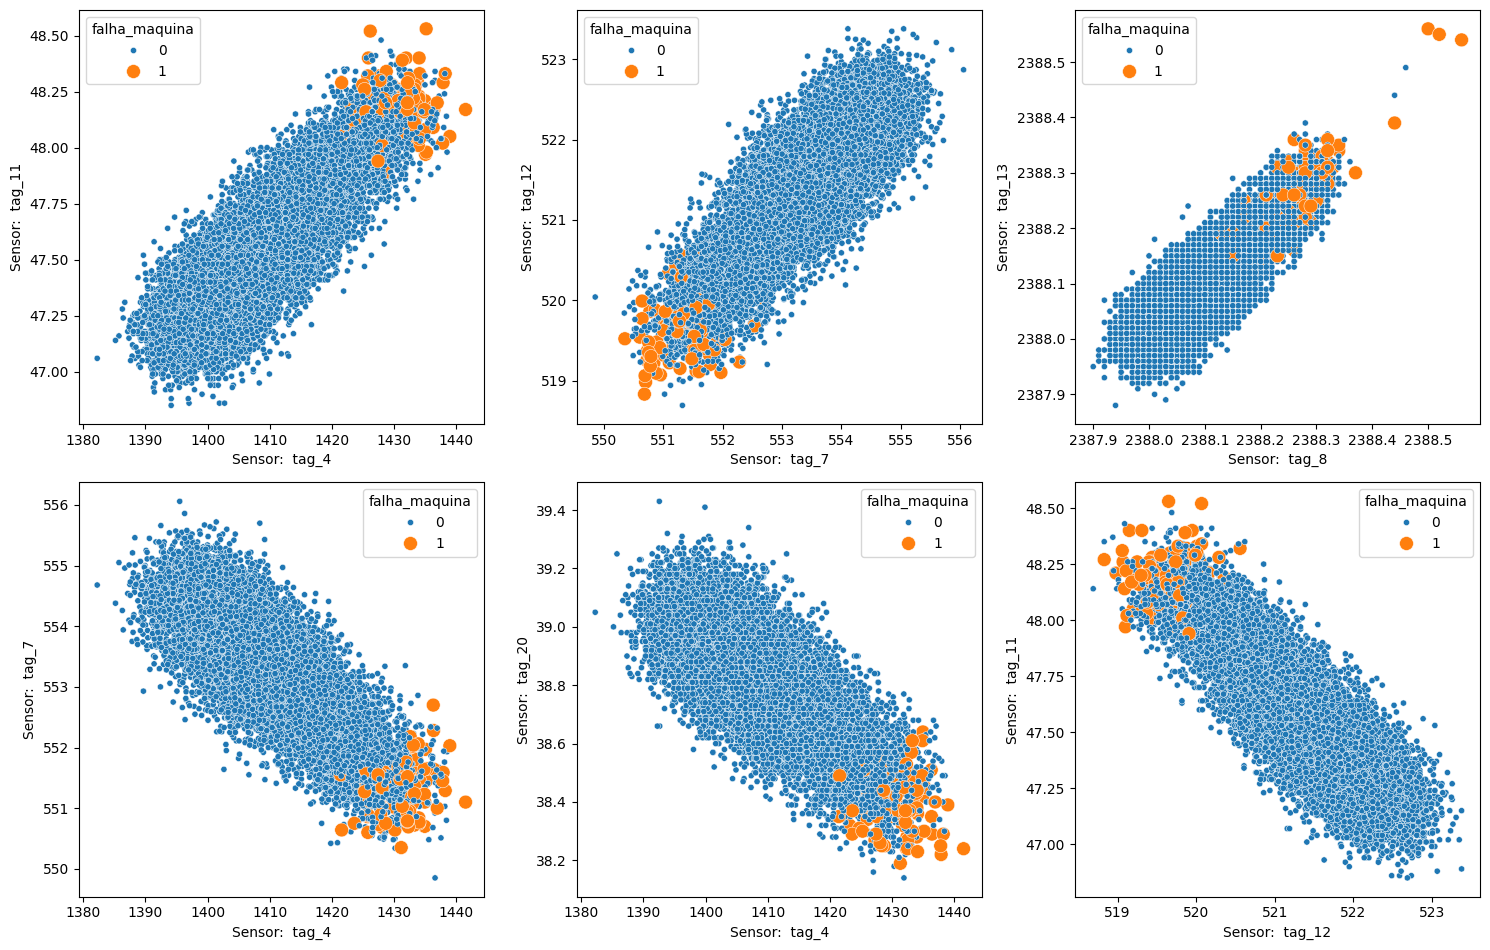

In [68]:
# Definir pares de colunas
pairs = [('tag_4', 'tag_11'), ('tag_7', 'tag_12'), ('tag_8', 'tag_13'),
         ('tag_4', 'tag_7'), ('tag_4', 'tag_20'), ('tag_12', 'tag_11')]

# Configurar a figura e os eixos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
#fig.suptitle('Gráficos de dispersão dos sensores mais correlacionados')

# Iterar sobre os pares de colunas e criar gráficos de dispersão
for (x, y), ax in zip(pairs, axes.flatten()):
    sns.scatterplot(x=x, y=y, data=data, ax=ax, color = 'orange', hue = 'falha_maquina', size = 'falha_maquina', sizes = (100, 20))
    ax.set_xlabel(f'Sensor:  {x}')
    ax.set_ylabel(f'Sensor:  {y}')

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar o gráfico
plt.show()

In [51]:
data.loc[indice_falha, 'falha_maquina'] = 1

In [69]:
data['target'] = 0
#Criando target: Prever falha em até 15 ciclos antes
equipamentos_unicos = data['id'].unique()
for equipamento in equipamentos_unicos:
    # Encontre o índice da linha onde ocorre a falha
    indice_falha = data[data['id'] == equipamento].index.max()
    
    # Defina as últimas 15 linhas até a falha como target = 1
    if indice_falha >= 15:
        data.loc[indice_falha - 14:indice_falha, 'target'] = 1
    else:
        data.loc[:indice_falha, 'target'] = 1

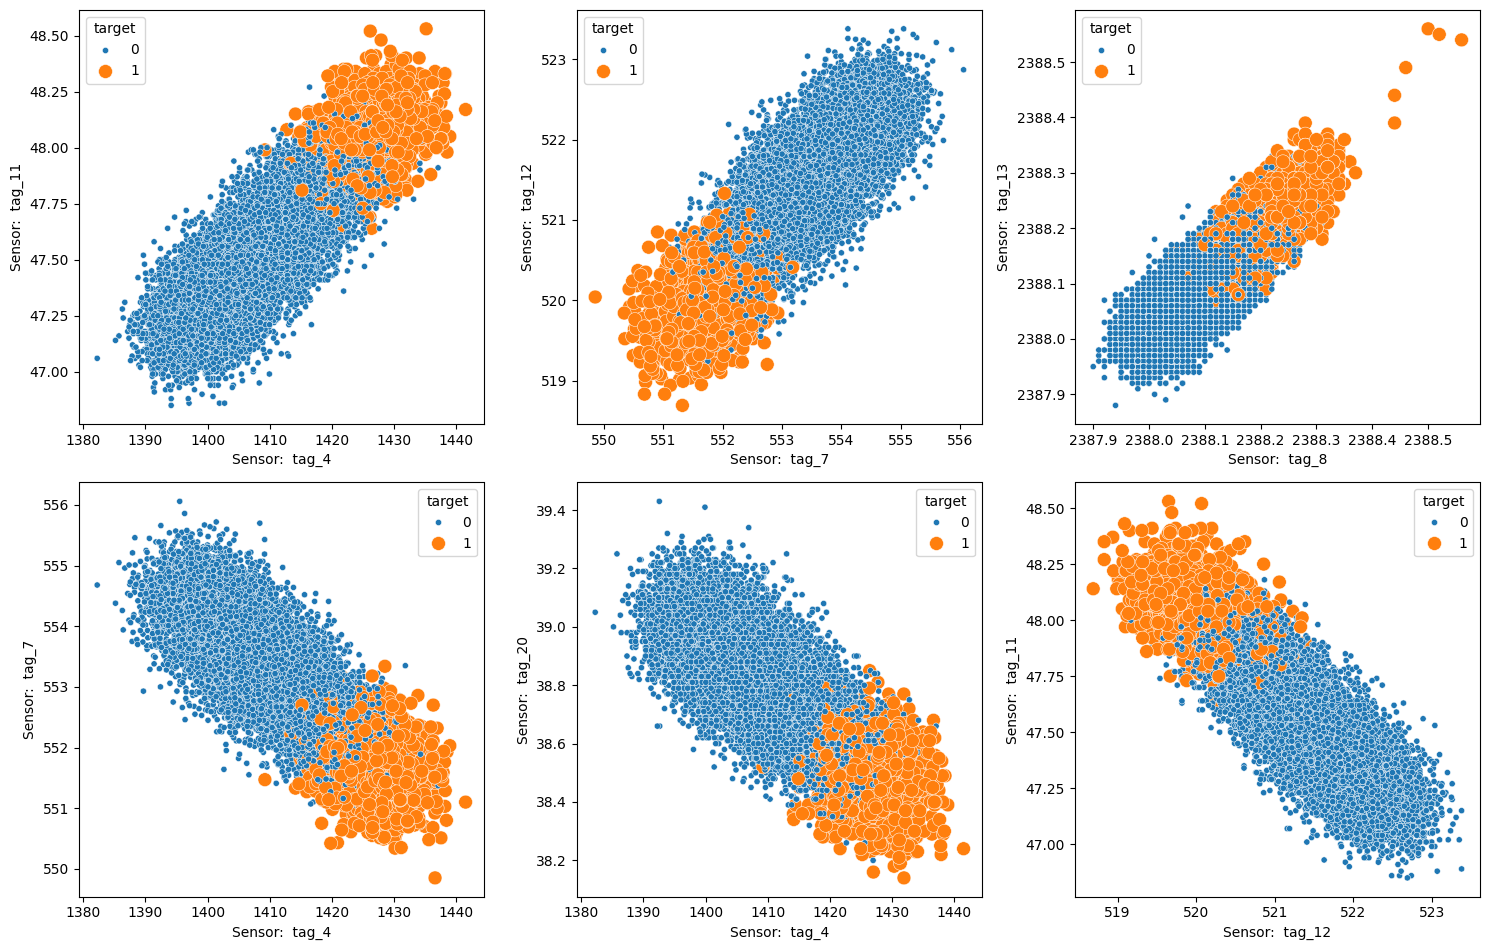

In [70]:
# Definir pares de colunas
pairs = [('tag_4', 'tag_11'), ('tag_7', 'tag_12'), ('tag_8', 'tag_13'),
         ('tag_4', 'tag_7'), ('tag_4', 'tag_20'), ('tag_12', 'tag_11')]

# Configurar a figura e os eixos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
#fig.suptitle('Gráficos de dispersão dos sensores mais correlacionados')

# Iterar sobre os pares de colunas e criar gráficos de dispersão
for (x, y), ax in zip(pairs, axes.flatten()):
    sns.scatterplot(x=x, y=y, data=data, ax=ax, color = 'orange', hue = 'target', size = 'target', sizes = (100, 20))
    ax.set_xlabel(f'Sensor:  {x}')
    ax.set_ylabel(f'Sensor:  {y}')

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar o gráfico
plt.show()

In [101]:
def verifica_escala(dataframe):
    # Verifica se as variáveis estão na mesma escala
    escalas = dataframe.apply(lambda col: col.max() - col.min())
    
    # Se todas as escalas forem iguais, retorna True, indicando que as variáveis estão na mesma escala
    # Caso contrário, retorna False
    print('maximo escala', escalas.max())
    print('minimo escala', escalas.min())

In [102]:
verifica_escala(data)

maximo escala 361.0
minimo escala 0.0


In [110]:
data[lista_colunas].drop(['id','runtime'], axis = 1).describe()

,setting1,setting2,setting3,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,...,tag_12,tag_13,tag_14,tag_15,tag_16,tag_17,tag_18,tag_19,tag_20,tag_21
count,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [136]:
#Dividindo treino e teste:
df_train = data[(data['id'] >= 1) & (data['id'] <= 75)]
df_test = data[(data['id'] > 75) & (data['id'] <= 100)]

x_train, y_train = df_train.drop(['target', 'id', 'runtime', 'falha_maquina'], axis = 1), df_train['target']
x_test, y_test = df_test.drop(['target', 'id', 'runtime', 'falha_maquina'], axis = 1), df_test['target']

In [138]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10, 20, 40]
}

# Instanciar o Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Cria objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring = 'recall')

# Faz o Fit aos Dados
grid_search.fit(x_train, y_train)

# Define melhores hiperparâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Mostra a melhor pontuação
print("Melhor pontuação:", grid_search.best_score_)

Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}
Melhor pontuação: 0.8391111111111111


In [139]:
rf_trained = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, min_samples_split = 2, n_estimators = 200)

In [140]:
rf_trained.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200)

In [141]:
predicted = rf_trained.predict_proba(x_test)

In [142]:
predict = [sub[1] for sub in predicted]

In [144]:
df_avaliacao = pd.DataFrame(data = y_test)

In [145]:
df_avaliacao['score'] = predict

In [146]:
df_avaliacao['erros'] = np.where((df_avaliacao['target'] == 1) & (df_avaliacao['score'] >= 0.5), 0, 1)

In [147]:
df_avaliacao['score_int'] = np.where(df_avaliacao['score'] >= 0.5, 1, 0)

In [203]:
df_avaliacao['score_int_2'] = np.where(df_avaliacao['score'] >= 0.45, 1, 0)

In [204]:
df_avaliacao['score_int_3'] = np.where(df_avaliacao['score'] >= 0.4, 1, 0)

In [205]:
df_avaliacao['score_int_4'] = np.where(df_avaliacao['score'] >= 0.35, 1, 0)

In [148]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [195]:
confusion_matrix(df_avaliacao['target'], df_avaliacao['score_int'])

array([[5050,   47],
       [  72,  303]], dtype=int64)

In [200]:
print(round(precision_score(df_avaliacao['target'], df_avaliacao['score_int'])*100, 2), '%')

86.57 %


In [202]:
print(round(recall_score(df_avaliacao['target'], df_avaliacao['score_int'])*100,2), '%')

80.8 %


In [209]:
print('Precisão: ', round(precision_score(df_avaliacao['target'], df_avaliacao['score_int_2'])*100, 2), '%')
print('Sensibilidade: ', round(recall_score(df_avaliacao['target'], df_avaliacao['score_int_2'])*100,2), '%')

Precisão:  85.03 %
Sensibilidade:  84.8 %


In [210]:
print('Precisão: ', round(precision_score(df_avaliacao['target'], df_avaliacao['score_int_3'])*100, 2), '%')
print('Sensibilidade: ',round(recall_score(df_avaliacao['target'], df_avaliacao['score_int_3'])*100,2), '%')

Precisão:  82.34 %
Sensibilidade:  88.27 %


In [211]:
print('Precisão: ', round(precision_score(df_avaliacao['target'], df_avaliacao['score_int_4'])*100, 2), '%')
print('Sensibilidade: ',round(recall_score(df_avaliacao['target'], df_avaliacao['score_int_4'])*100,2), '%')

Precisão:  78.03 %
Sensibilidade:  90.93 %


In [152]:
from sklearn.metrics import roc_curve, roc_auc_score

In [153]:
roc_auc_score(df_avaliacao['target'], df_avaliacao['score'])

0.9945635995029756

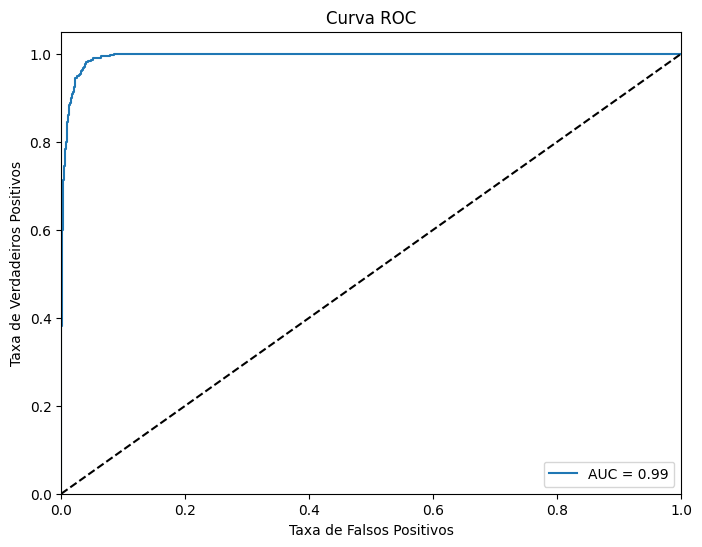

In [154]:
import matplotlib.pyplot as plt
# Calcule a pontuação AUC-ROC
auc_roc = roc_auc_score(df_avaliacao['target'], df_avaliacao['score'])

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(df_avaliacao['target'], df_avaliacao['score'])

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Calcule a pontuação AUC-ROC
auc_roc = roc_auc_score(df_avaliacao['target'], df_avaliacao['score'])

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(df_avaliacao['target'], df_avaliacao['score'])

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [155]:
from sklearn.metrics import classification_report

In [156]:
print(classification_report(df_avaliacao['target'], df_avaliacao['score_int']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5097
           1       0.87      0.81      0.84       375

    accuracy                           0.98      5472
   macro avg       0.93      0.90      0.91      5472
weighted avg       0.98      0.98      0.98      5472



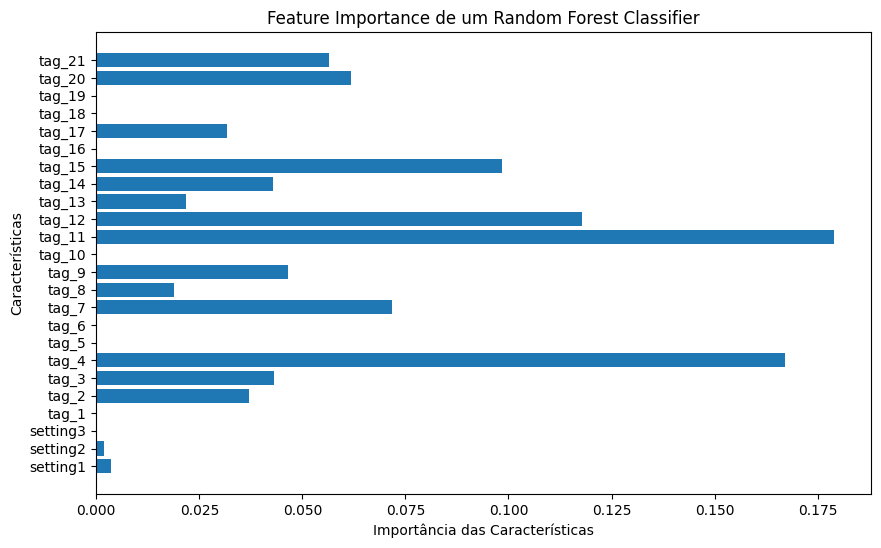

In [157]:
feature_importance = rf_trained.feature_importances_
feature_names = x_test.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Importância das Características')
plt.ylabel('Características')
plt.title('Feature Importance de um Random Forest Classifier')
plt.show()

In [158]:
df_avaliacao

,target,score,erros,score_int
15159,0,0.000028,1,0
15160,0,0.000034,1,0
15161,0,0.000053,1,0
15162,0,0.000076,1,0
15163,0,0.000035,1,0
...,...,...,...,...
20626,1,0.861532,0,1
20627,1,0.892939,0,1
20628,1,0.950768,0,1
20629,1,0.919428,0,1


In [181]:
from scipy.stats import ks_2samp
df_ones = df_avaliacao[df_avaliacao.target == 1]
df_zeros = df_avaliacao[df_avaliacao.target == 0]

ks_statistic, ks_p_value = ks_2samp(df_zeros['score'], df_ones['score'])
print(ks_statistic)
print(ks_p_value)

0.9407212085540514
3.4e-322


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


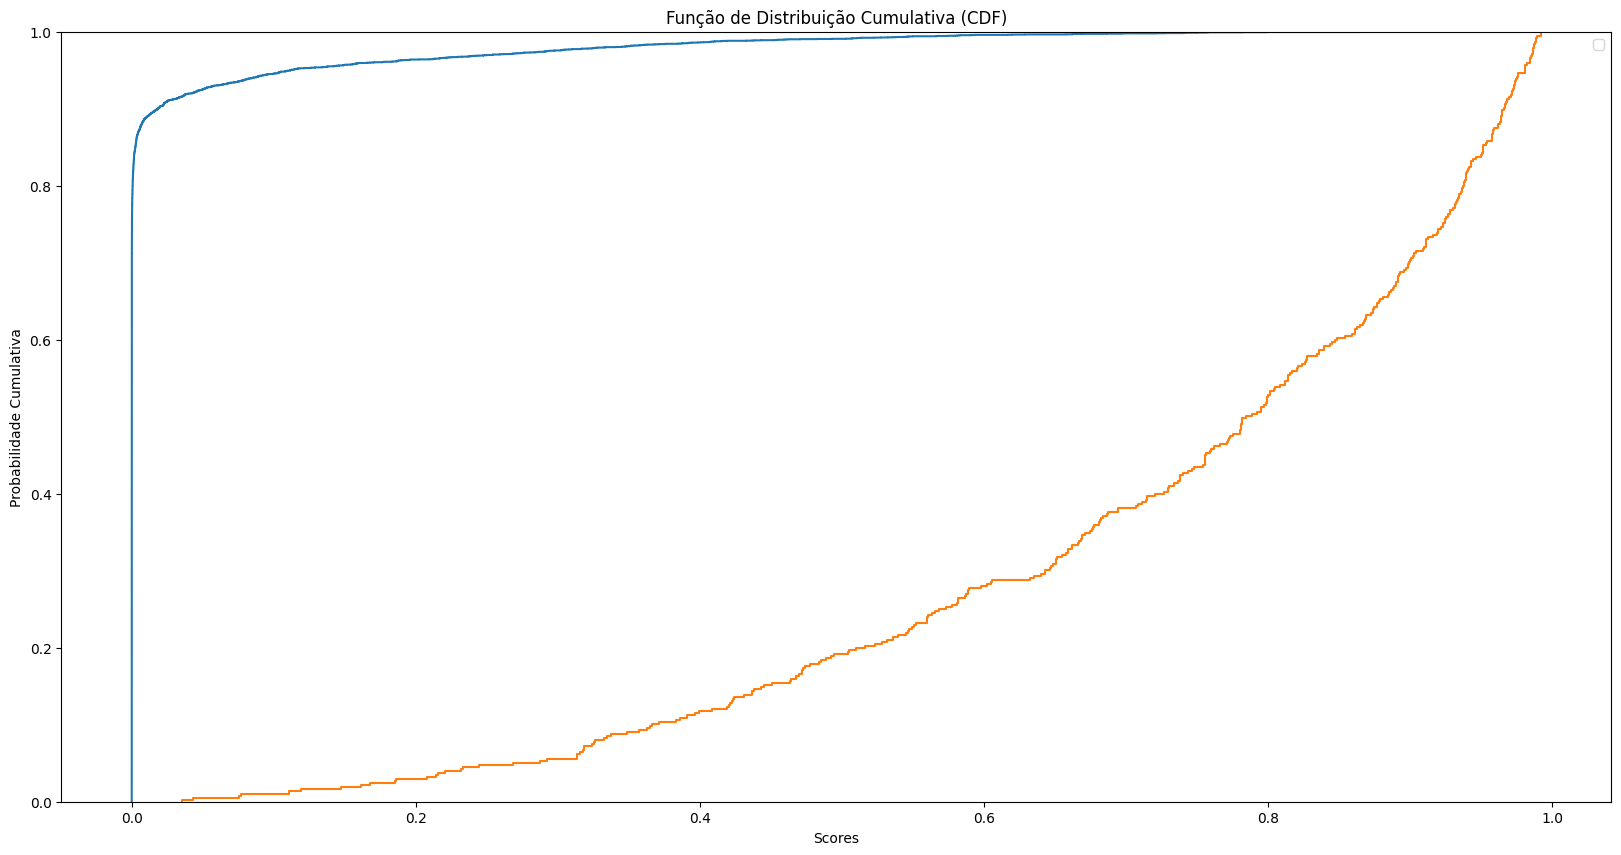

In [194]:
plt.figure(figsize = (20, 10))
sns.ecdfplot(data=df_zeros, x='score', stat='proportion', complementary=False)
sns.ecdfplot(data=df_ones, x='score', stat='proportion', complementary=False)
plt.xlabel('Scores')
plt.ylabel('Probabilidade Cumulativa')
plt.legend()
plt.title('Função de Distribuição Cumulativa (CDF)')
plt.show()


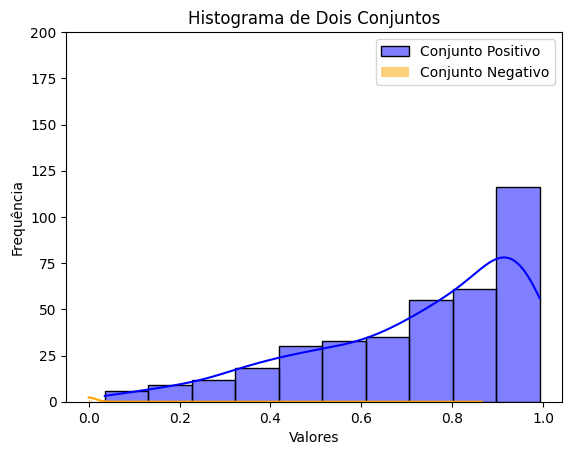

In [169]:
sns.histplot(data=df_ones['score'], kde=True, color='blue', label='Conjunto Positivo')
sns.histplot(data=df_zeros['score'], kde=True, color='orange', label='Conjunto Negativo')

plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.ylim((0, 200))
plt.title('Histograma de Dois Conjuntos')
plt.legend()
plt.show()



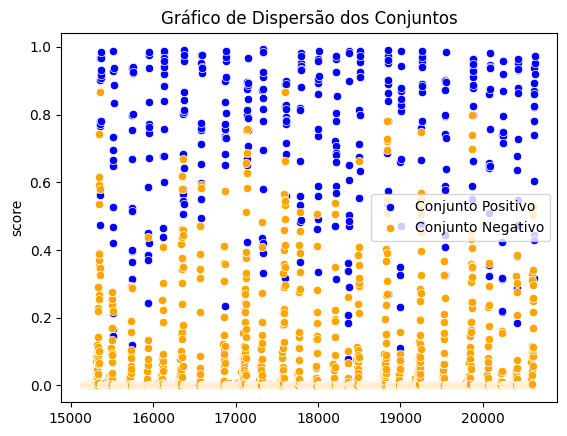

In [179]:
sns.scatterplot(data=df_ones['score'], color='blue', label='Conjunto Positivo')
sns.scatterplot(data=df_zeros['score'], color='orange', label='Conjunto Negativo')

plt.title('Gráfico de Dispersão dos Conjuntos')
plt.legend()
plt.show()

In [212]:
file_path = "PM_test.txt"

In [214]:
data_test = pd.read_csv(file_path, delimiter= ' ', header = None)

In [215]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN
